In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
#function to resize to the resolution 100*100
def resize(images):
    return image.resize((100,100))

In [3]:
os.chdir('data/lfw')
labels = []

In [4]:
number_images = 0
images  = []
for i in os.listdir():
    labels.append(i)
    image = Image.open(i+'/'+os.listdir('./'+i)[0])
    image = resize(image)
    image = image.convert(mode='L')
    number_images = number_images +1
    images.append(np.asarray(image))
images = np.asarray(images)

(5749, 10000)


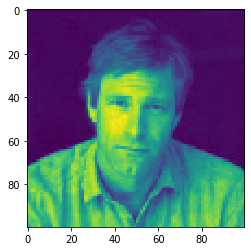

In [5]:
#let us look at the resized image
plt.imshow(images[0])
flattened_images = images.reshape(images.shape[0],images.shape[1]*images.shape[2])
print(flattened_images.shape)

In [6]:
#Using svd to decompose the flattened images into the constituent matrices first matrix gives the eigen vectors to project upon
U,S,V = np.linalg.svd(flattened_images.T)

In [7]:
print(U.shape)
#here we calculate the new coordinates of the image in the new basis

new_basis_images = np.dot(flattened_images,U[:,:300])
first_image_new_components = new_basis_images[0,:]


(10000, 10000)


<Figure size 432x288 with 0 Axes>

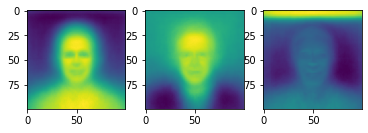

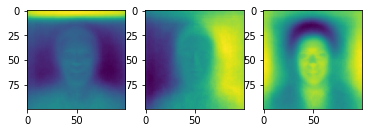

In [8]:
fig = plt.figure()
prev_j = 0
for i in range(0,2):
        _,ax = plt.subplots(1,3,'row')
        c = 0
        for j in range(prev_j,prev_j+3):
            ax[c].imshow(U[:,j+1].reshape(100,100))
            c = c+1
        prev_j = j

In [9]:
linear_combination = np.zeros((10000,1))
for i in range(0,300):
    linear_combination = +np.dot(first_image_new_components[i],U[:,i])


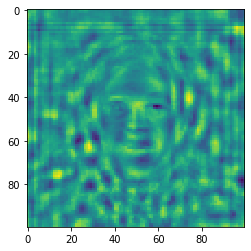

In [10]:
plt.imshow(linear_combination.reshape(100,100))

In [11]:
first_image_new_components.shape

(300,)

In [12]:
# image = Image.open('Aaron_Peirsol/Aaron_Peirsol_0002.jpg')
# image = image.resize((100,100))
# image = image.convert(mode='L')
# image = np.asarray(image)
# image_components = np.dot(image.reshape(1,10000),U[:,:300])
# new_basis_images.shape
# square_distance = np.sqrt(np.sum((new_basis_images-image_components)**2,axis = 1))
# square_distance[np.argmax(square_distance)]
# square_distance

In [13]:
#conclusion is that this doesn't work the way becuase even though it may get the important features out of the image when getting the principal components
#this doesn't gaurantee you the production of components that are to some extent near to the one that we are about to test in the feature space